<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/BDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# =======================
# STEP 1: Upload the file
# =======================
from google.colab import files
import io
import pandas as pd

print("ðŸ“¤ Please choose your 'yield_df.csv' file from your computer...")
uploaded = files.upload()  # this opens a file picker window in Colab

# read the uploaded CSV
file_name = list(uploaded.keys())[0]   # get the uploaded file name dynamically
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("âœ… Dataset Loaded Successfully!")
print(df.head())

# =======================
# STEP 2: Model training
# =======================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target
X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']]
y = df['Item']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# =======================
# STEP 3: Evaluation
# =======================
print("\nâœ… Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


ðŸ“¤ Please choose your 'yield_df.csv' file from your computer...


Saving yield_df.csv to yield_df.csv
âœ… Dataset Loaded Successfully!
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

âœ… Model Evaluation Results:
Accuracy: 0.3352805806337405

Confusion Matrix:
 [[ 22  30  98 115  41   4  11  60   9  19]
 [  0  88   8  44  58  55 385  16 138  26]
 [ 11   3  47  14  22   7   1   

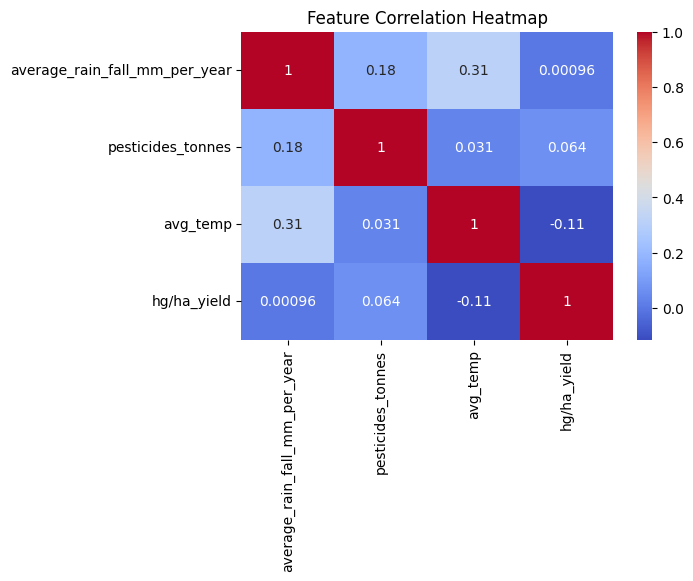

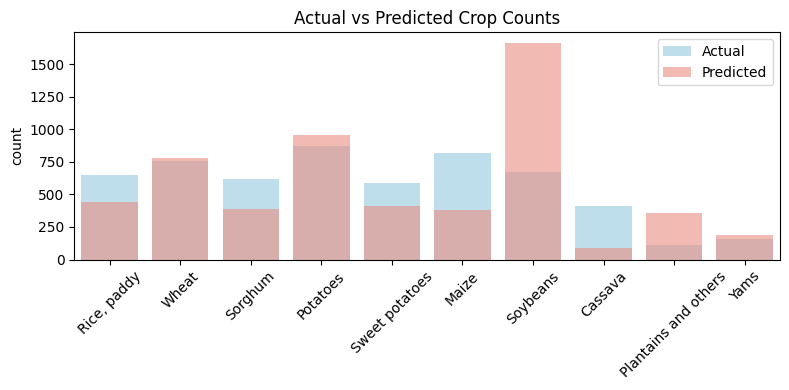

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#Actual vs Predicted comparison
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

plt.figure(figsize=(8,4))
sns.countplot(x=y_test_labels, color='skyblue', label='Actual', alpha=0.6)
sns.countplot(x=y_pred_labels, color='salmon', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Crop Counts')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

